# Método de la Falsa Posición

<Figure size 640x480 with 0 Axes>

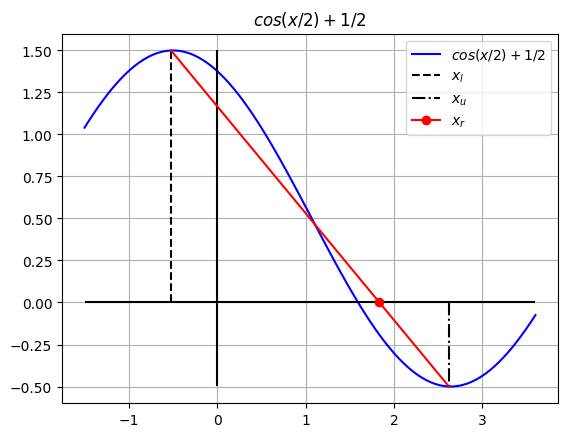

In [ ]:
# @title Método de Falsa Posición
import numpy as np
import matplotlib.pyplot as plt
plt.figure()

x = np.linspace(-1.5,3.6, 100)
a = 0.5  # Desplazamiento hacia arriba
b = 0.5  # Desplazamiento hacia la derecha
y = np.cos(x+b)+a

fig, ax = plt.subplots()
ax.plot(x,y,color='blue',label="$cos(x/2) + 1/2$")
ax.grid()

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(y),ymax=max(y),color='k')
ax.hlines(y=0,xmin=min(x),xmax=max(x),color='k')


# Encontrar la posición del valor mínimo de y
indice_minimo = np.argmin(y)
posicion_minimo = x[indice_minimo]

# Encontrar la posición del valor máximo de y
indice_maximo = np.argmax(y)
posicion_maximo = x[indice_maximo]

## límites xl y xu
ax.vlines(x=posicion_maximo, ymin=0, ymax=max(y), color='k', linestyle='--',label='$x_l$')
ax.vlines(x=posicion_minimo, ymin=0, ymax=min(y), color='k', linestyle='-.',label='$x_u$')

## Trazo de la linea recta
ax.plot([posicion_maximo,posicion_minimo],[max(y),min(y)],color='red')
ax.plot([1.83],[0],marker='o',color='red',label='$x_r$')
"""
# Agregar texto en una ubicación específica
text_x = 0.6  # Posición en el eje X
text_y = 0  # Posición en el eje Y
ax.text(text_x, text_y+0.01, 'xu', fontsize=12, color='black')
ax.text(-text_x, -1*(text_y+0.03), 'xl', fontsize=12, color='black')"""

ax.set_title("$cos(x/2) + 1/2$")
plt.legend()
plt.show()

<img src="https://docplayer.es/docs-images/87/95843293/images/35-0.jpg"/>

Consiste en hallar una raíz aproximada de una función en un intervalo dado, en algunos casos más eficiente que la **bisección**.

Toma en cuenta la magnitud de la función. Crea una linea recta entre los **2** puntos y la raíz de la recta se aproxima a la raíz de la función a diferencia de la bisección que parte en 2 lados iguales.

## Teorema de la semejanza

$$\frac{f(x_l)}{x_r - x_l} = \frac{-f(x_u)}{x_r-x_u}$$


$$\frac{f(x_l)}{x_r - x_l} = \frac{f(x_u)}{x_u-x_r}$$


$$f(x_l)[x_r - x_u] = f(x_u)[x_r - x_l]$$

$$f(x_l)*x_r - f(x_l)*x_u = f(x_u)*x_r - f(x_u)*x_l$$

$$f(x_l)*x_r - f(x_u)*x_r = f(x_l)*x_u - f(x_u)*x_l$$

$$ x_r = \frac{f(x_l)*x_u - f(x_u)*x_l}{f(x_l)-f(x_u)}$$

### Forma alternativa

$$x_r = \frac{f(x_l)*x_u}{f(x_l)-f(x_u)} - \frac{f(x_u)*x_l}{f(x_l)-f(x_u)}$$

$$x_r = x_u+ \frac{f(x_l)*x_u}{f(x_l)-f(x_u)} - \frac{f(x_u)*x_l}{f(x_l)-f(x_u)} - x_u$$

$$x_r = x_u - \frac{f(x_u)[x_l - x_u]}{f(x_l)-f(x_u)} $$

**Esta última forma la necesitamos más adelante**



## Algoritmo para la Falsa posición

1. Encontrar un intervalo en donde $$f(x1)*f(xu)<0$$.
2. Se haya una raíz aproximada:
  $$ x_r = \frac{f(x_l)*x_u - f(x_u)*x_l}{f(x_l)-f(x_u)}$$

3. Encontrar el subintervalo en donde cae la raíz de la siguiente forma:

  * Si $$f(xl)*f(xr) < 0$$ la raíz está entre el intervalo $xl$ y $xr$. Por tal razón, $xu=xr$ y retorno al paso 2.
  * Si $$f(xl)*f(xr) > 0$$ la raíz está entre el intervalo $xr$ y $xu$. Por tal razón, $xl=xr$ y retorno al paso 2.
  * Si $$f(xl)*f(xr) = 0$$ la raíz es $xr$ y termina el cálculo

### Cálculo del error relativo

$$
e_r = \lvert \frac{xr_{actual}-xr_{anterior}}{xr_{actual}}\rvert
$$

### Tolerancia

Es qué tan aproximada será la raíz calculada.

### Ejemplo

Calcular la raíz de $f(x)=x^{3}-x$ en el intervalo (0.2, 1.7) con una tolerancia de 1%

### Solución

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
# Tomamos el intérvalo inicial y grafiquemos la función dentro de ese valor

x = sp.symbols('x')

y = x**3 - x
print("La función es: ",y)

xl,xu = (0.2,1.7)

print(f"El intervalo es: ({xl},{xu}) ")

fxl, fxu = (round(y.subs({x: xl}), 4), round(y.subs({x: xu}), 4))
print(f"la función evaluada en xl y xu respectivamente : (f({xl})={fxl},  f({xu})={fxu}) ")

La función es:  x**3 - x
El intervalo es: (0.2,1.7) 
la función evaluada en xl y xu respectivamente : (f(0.2)=-0.1920,  f(1.7)=3.2130) 


<Figure size 640x480 with 0 Axes>

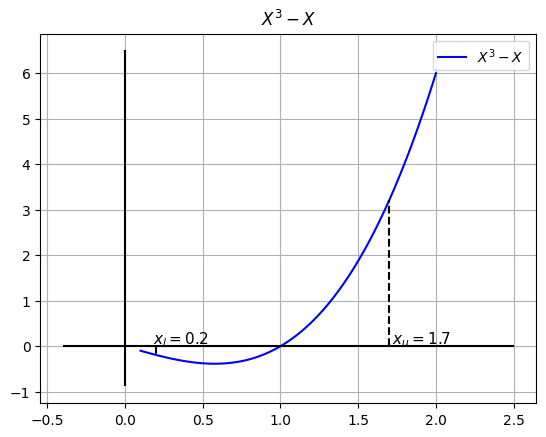

In [ ]:
# @title Gráfica incial de la función en el rango especificado
import numpy as np
plt.figure()

r = np.linspace(0.1,2, 100)
fx = [y.subs({x:xi}) for xi in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$X^3 - X$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.5,ymax=max(fx)+0.5,color='k')
ax.hlines(y=0,xmin=min(r)-0.5,xmax=max(r)+0.5,color='k')

## Límites xl y xu
ax.vlines(x=xl, ymin=0, ymax=fxl, color='k', linestyle='--')
ax.vlines(x=xu, ymin=0, ymax=fxu, color='k', linestyle='--')

## Texto de xl y xu
ax.text(xl-0.02, 0.05, f'$x_l={xl}$', fontsize=11, color='black')
ax.text(xu+0.02, 0.05, f'$x_u={xu}$', fontsize=11, color='black')

ax.set_title("$X^3-X$")
ax.grid()
ax.legend()
plt.show()

#### Calculemos ahora la raíz supuesta...

$$ x_r = \frac{f(x_l)*x_u - f(x_u)*x_l}{f(x_l)-f(x_u)}$$

In [ ]:
xr = round(((fxl*xu)-(fxu*xl))/(fxl-fxu),4)
fxr = round(y.subs({x:xr}),4)
print(" xr = {:.4f}, f(xr) = {:.4f}".format(xr,fxr))

 xr = 0.2846, f(xr) = -0.2616


<Figure size 640x480 with 0 Axes>

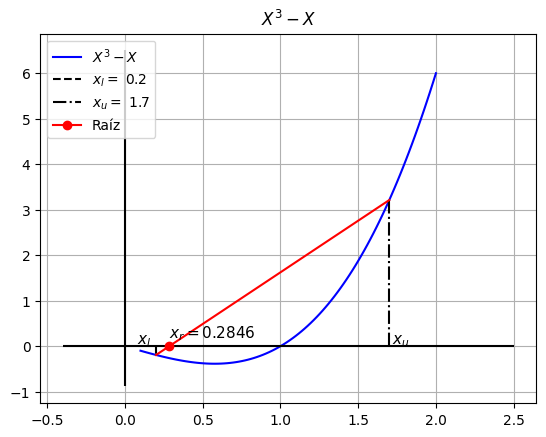

In [ ]:
# @title Gráfica incial con el punto de $x_r$
import numpy as np
plt.figure()

r = np.linspace(0.1,2, 100)
fx = [y.subs({x:xi}) for xi in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$X^3 - X$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.5,ymax=max(fx)+0.5,color='k')
ax.hlines(y=0,xmin=min(r)-0.5,xmax=max(r)+0.5,color='k')

## Límites xl y xu
ax.vlines(x=xl, ymin=0, ymax=fxl, color='k', linestyle='--',label="$x_l =$ "+str(xl))
ax.vlines(x=xu, ymin=0, ymax=fxu, color='k', linestyle='-.',label="$x_u =$ "+str(xu))

## Texto de xl y xu
ax.text(xl-0.12, 0.05, f'$x_l$', fontsize=11, color='black')
ax.text(xu+0.02, 0.05, f'$x_u$', fontsize=11, color='black')


## Trazo de la linea recta
ax.plot([xl,xu],[fxl,fxu],color='red')

## Pintamos el punto intermedio
ax.plot(xr,0,color='red',label='Raíz',marker='o')
ax.text(xr,0.18, f'$x_r={xr}$', fontsize=11, color='black')

ax.set_title("$X^3-X$")
ax.grid()
ax.legend()
plt.show()

#### Calculemos el error...



Como es la primer iteración, NO tendremos forma de calcular un error ya que no existe un $xr$ anterior. Para las siguientes iteraciones si vamos a calcular el error tomando la siguiente formula.

$$
e_r = \lvert \frac{Xr_{actual}-Xr_{anterior}}{Xr_{actual}}\rvert = INDIFERENTE
$$

OJO: Solo para la primer iteración se define arbitrariamente

In [ ]:
# @title Tabla de iteraciones
import pandas as pd

columnas = ['Xl','Xu','Xr','er(%)','f(Xl)','f(Xu)','f(Xr)']

primer_iter = {'Xl':[xl],'Xu':[xu],'Xr':[xr],'er(%)':[None],'f(Xl)':[fxl],'f(Xu)':[fxu],'f(Xr)':[fxr]}

tabla = pd.DataFrame(data=primer_iter,columns=columnas)
tabla.head(1)

,Xl,Xu,Xr,er(%),f(Xl),f(Xu),f(Xr)
0,0.2,1.7,0.2846,None,-0.1920,3.2130,-0.2616


#### Revisemos las condiciones

* Si $$f(xl)*f(xr) < 0$$ la raíz está entre el intervalo xl y xr. Por tal razón, xu=xr y retorno al paso 2.
* Si $$f(xl)*f(xr) > 0$$ la raíz está entre el intervalo xr y xu. Por tal razón, xl=xr y retorno al paso 2.
* Si $$f(xl)*f(xr) = 0$$ la raíz es xr y termina el cálculo


In [ ]:
if (fxl * fxr) < 0:
  print("La raíz está entre el intervalo xl y xr")
  xu = xr
elif (fxl*fxr) > 0:
  print("La raíz está entre el intervalo xr y xu")
  xl = xr
elif (fxl*fxr) == 0:
  print("terminé")

La raíz está entre el intervalo xr y xu


#### Repetimos los pasos anteriores para calcular el nuevo Xr y el error

In [ ]:
fxl= round(y.subs({x:xl}),4)
fxu= round(y.subs({x:xu}),4)
xr2 = round(((fxl*xu)-(fxu*xl))/(fxl-fxu),4)
fxr2 = round(y.subs({x:xr2}),4)
print(" xr = {:.4f}, f(xr) = {:.4f}".format(xr2,fxr2))
error = round(np.abs((xr2-xr)/(xr2))*100,4)
print("El error de este cálculo es: {:.4f}% ".format(error))

 xr = 0.3912, f(xr) = -0.3313
El error de este cálculo es: 27.2500% 


<Figure size 640x480 with 0 Axes>

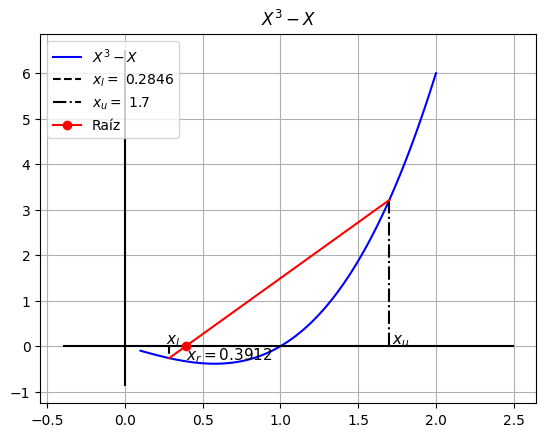

In [ ]:
# @title Gráfica del método para la iteración 2
import numpy as np
plt.figure()

r = np.linspace(0.1,2, 100)
fx = [y.subs({x:xi}) for xi in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$X^3 - X$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.5,ymax=max(fx)+0.5,color='k')
ax.hlines(y=0,xmin=min(r)-0.5,xmax=max(r)+0.5,color='k')

## Límites xl y xu
ax.vlines(x=xl, ymin=0, ymax=fxl, color='k', linestyle='--',label="$x_l =$ "+str(xl))
ax.vlines(x=xu, ymin=0, ymax=fxu, color='k', linestyle='-.',label="$x_u =$ "+str(xu))

## Texto de xl y xu
ax.text(xl-0.02, 0.05, f'$x_l$', fontsize=11, color='black')
ax.text(xu+0.02, 0.05, f'$x_u$', fontsize=11, color='black')

## Pintamos el punto intermedio
ax.plot(xr2,0,color='red',label='Raíz',marker='o')
ax.text(xr2,-0.3, f'$x_r={xr2}$', fontsize=11, color='black')

## Trazo de la linea recta
ax.plot([xl,xu],[fxl,fxu],color='red')

ax.set_title("$X^3-X$")
ax.grid()
ax.legend()
plt.show()

In [ ]:
# @title Actualizamos la tabla de iteraciones
nueva_fila = {'Xl': xl, 'Xu': xu, 'Xr': xr2, 'er(%)': error, 'f(Xl)': fxl, 'f(Xu)': fxu, 'f(Xr)':fxr2}
tabla = tabla.append(nueva_fila, ignore_index=True)
tabla.head()

<ipython-input-74-912f58af88d4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append(nueva_fila, ignore_index=True)


,Xl,Xu,Xr,er(%),f(Xl),f(Xu),f(Xr)
0,0.2,1.7,0.2846,None,-0.1920,3.2130,-0.2616
1,0.2846,1.7,0.3912,27.25,-0.2616,3.2130,-0.3313


# Actividad en clase: Iteremos hasta que el error sea de 1%

## Implemente el algoritmo usted mismo.

In [ ]:
## Tu código va acá

## Tu código termina acá

# Ejercicio

Calcular la raíz  de $y = \frac{667,38}{x}(1 - e^{-0,146843x}) - 40$ en el intervalo (12, 16) con una tolerancia de 0.5%

Implementar una función que me permita dinámicamente modificar la tolerancia y el intervalo, además de la gráfica y que me retorne la raíz, el error, la tabla de iteraciones y la gráfica dinámica de como itera el método.